# Books Recommender system using clustering
Collaborative filtering


In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv(
    'data/BX-Books.csv', 
    sep=";", on_bad_lines='skip',
    low_memory=False ,
    encoding='latin-1')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.shape

(271360, 8)

In [5]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

## Count books by year

### Bar char

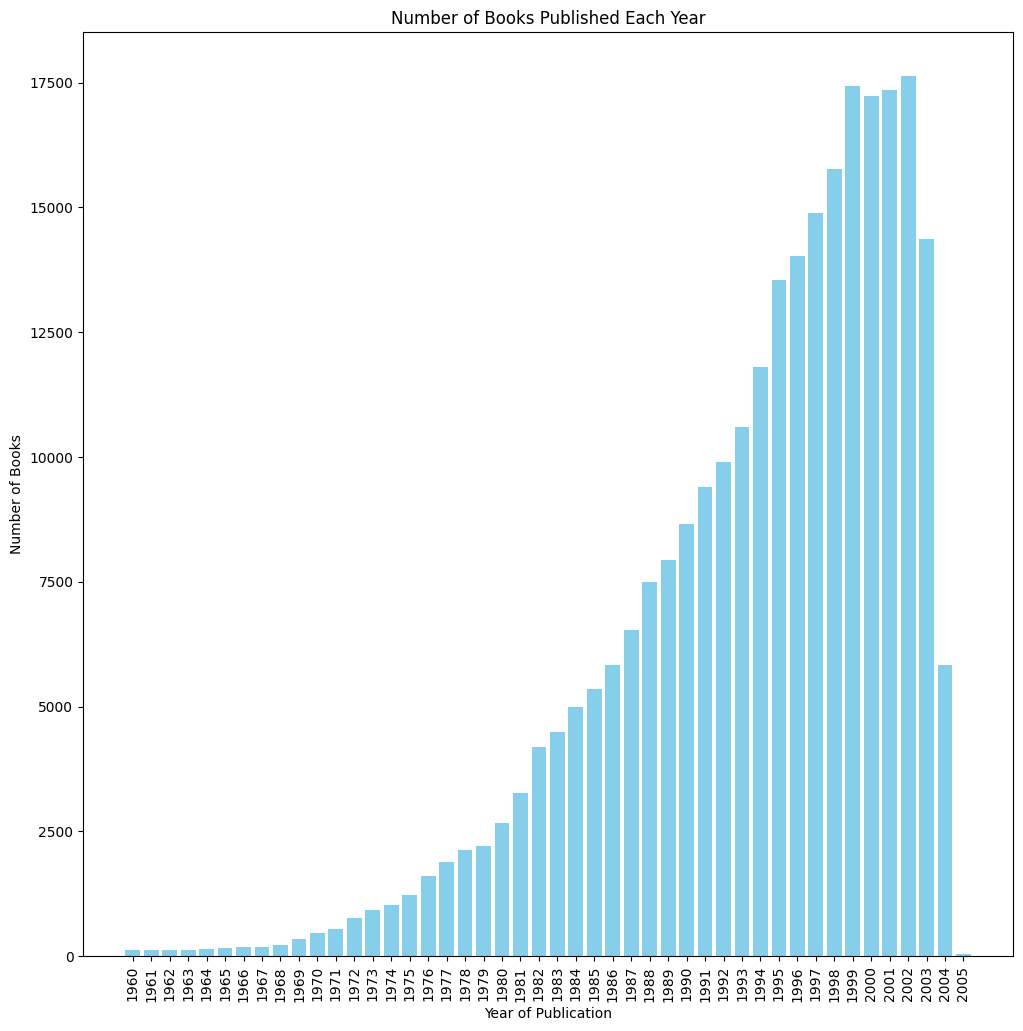

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'books' is your DataFrame and 'year of publication' is the column name
# Group by 'year of publication' and count the number of books for each year
yearly_counts = books['Year-Of-Publication'].value_counts().sort_index()

# Filter out the year 0
yearly_counts = yearly_counts[(yearly_counts.index >= '1960')&('2005'>=yearly_counts.index) ]

# Get the range of years
min_year = yearly_counts.index.min()
max_year = yearly_counts.index.max()

# Filter the data to include only the range of min_year to max_year
yearly_counts = yearly_counts.loc[min_year:max_year]

# Plotting the data
plt.figure(figsize=(12, 12))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.title('Number of Books Published Each Year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Pie char

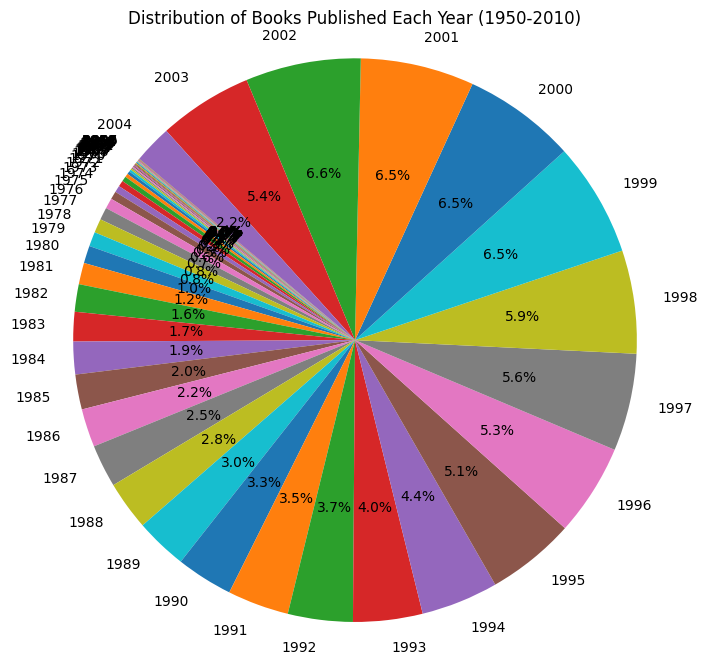

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'books' is your DataFrame and 'Year-Of-Publication' is the column name
# Group by 'Year-Of-Publication' and count the number of books for each year
yearly_counts = books['Year-Of-Publication'].value_counts().sort_index()

# Filter out the years outside the range 1950 to 2010
yearly_counts = yearly_counts[(yearly_counts.index >= '1950') & (yearly_counts.index <= '2010')]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(yearly_counts.values, labels=yearly_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Books Published Each Year (1950-2010)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Top 15 author who have written the most books

In [8]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

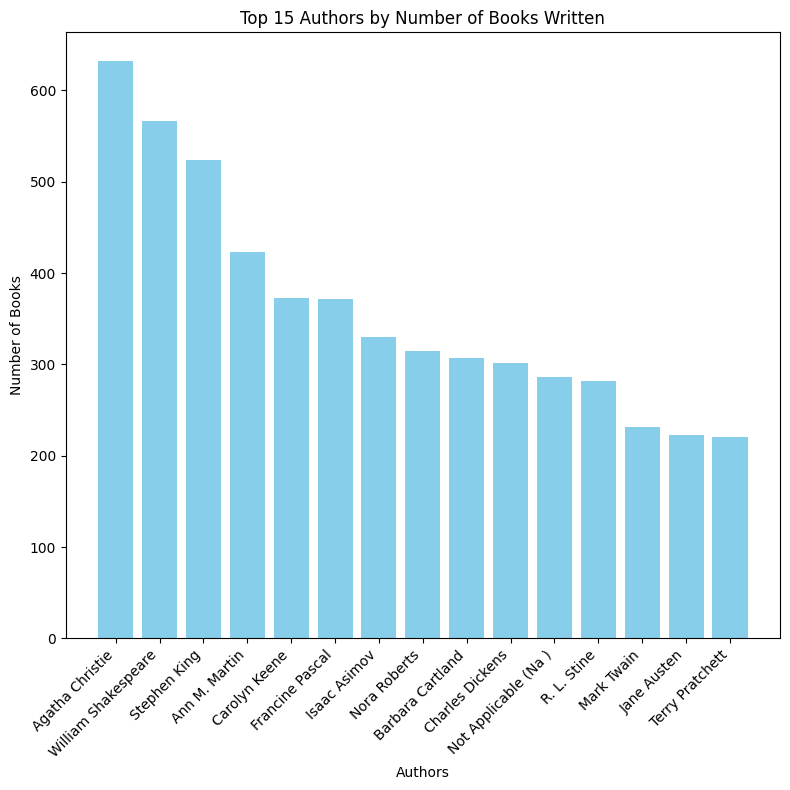

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'books' is your DataFrame and 'Book-Author' is the column name
# Count the number of books written by each author
author_counts = books['Book-Author'].value_counts()

# Select the top 15 authors
top_15_authors = author_counts.head(15)

# Plotting the bar chart
plt.figure(figsize=(8, 8))
plt.bar(top_15_authors.index, top_15_authors.values, color='skyblue')
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.title('Top 15 Authors by Number of Books Written')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

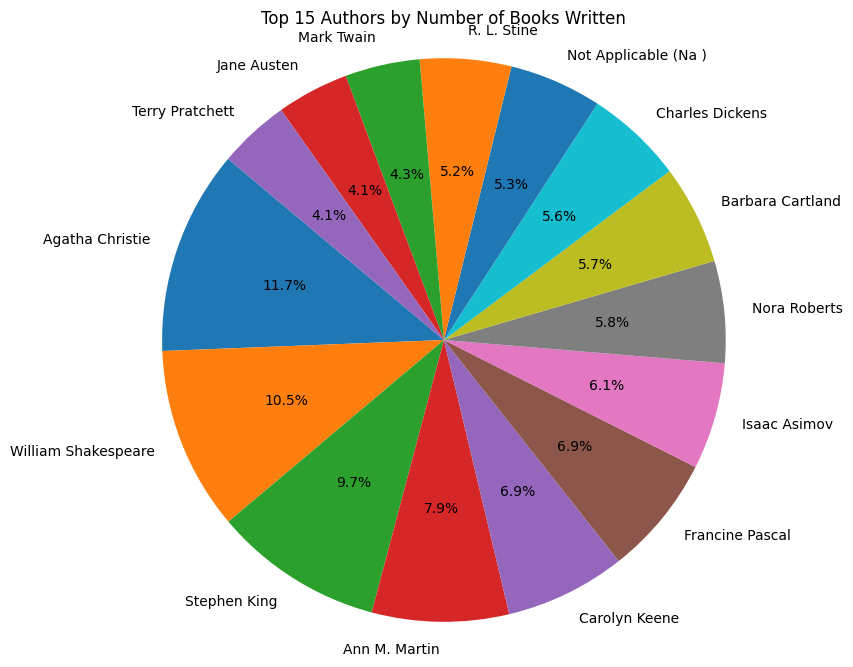

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'books' is your DataFrame and 'Book-Author' is the column name
# Count the number of books written by each author
author_counts = books['Book-Author'].value_counts()

# Select the top 15 authors
top_15_authors = author_counts.head(15)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_15_authors.values, labels=top_15_authors.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Authors by Number of Books Written')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Top publishers with the most books

In [11]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

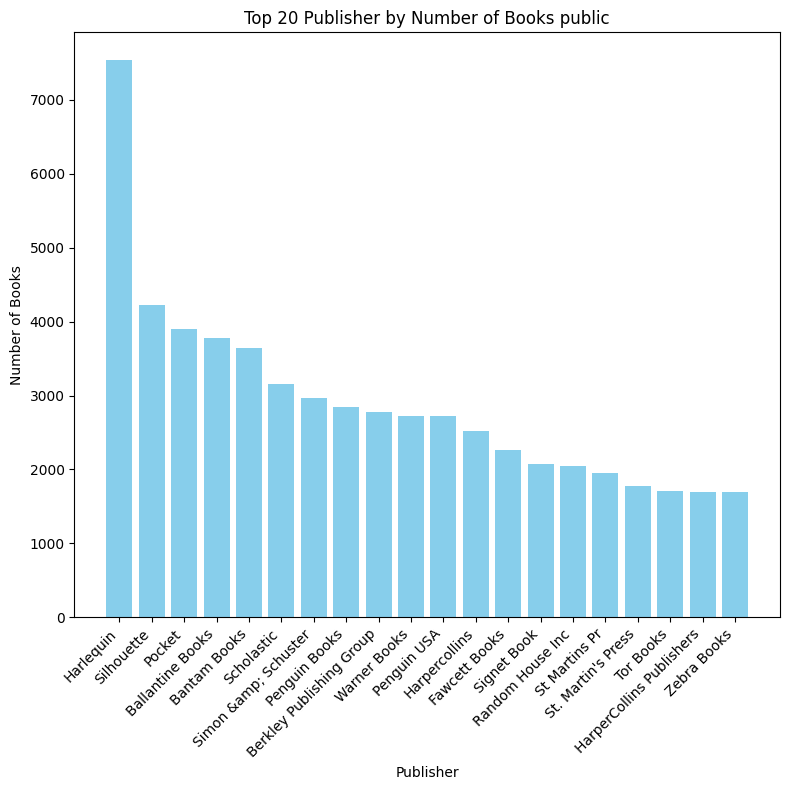

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


publisher_counts = books['Publisher'].value_counts()


top_20_publishers = publisher_counts.head(20)

# Plotting the bar chart
plt.figure(figsize=(8, 8))
plt.bar(top_20_publishers.index, top_20_publishers.values, color='skyblue')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.title('Top 20 Publisher by Number of Books public')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

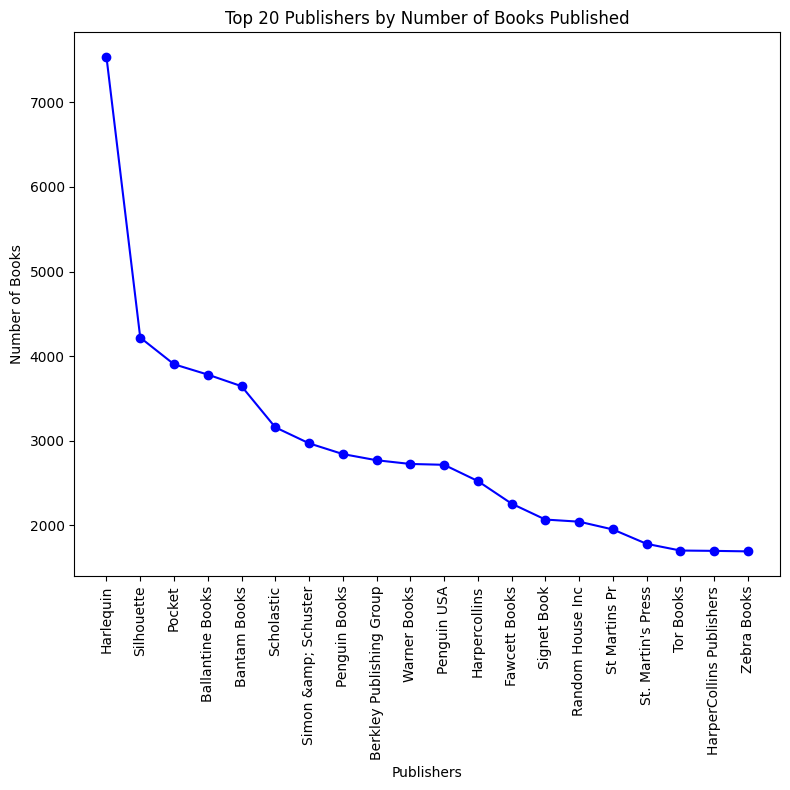

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'books' is your DataFrame and 'Publisher' is the column name
# Count the number of books published by each publisher
publisher_counts = books['Publisher'].value_counts()

# Select the top 20 publishers
top_20_publishers = publisher_counts.head(20)

# Plotting the line chart
plt.figure(figsize=(8, 8))
plt.plot(top_20_publishers.index, top_20_publishers.values, marker='o', linestyle='-', color='b')
plt.xlabel('Publishers')
plt.ylabel('Number of Books')
plt.title('Top 20 Publishers by Number of Books Published')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

## Remove large url size


In [14]:
books.shape

(271360, 8)

In [15]:
# before removing 
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [16]:
books.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [17]:
books.iloc[237]['Image-URL-S']

'http://images.amazon.com/images/P/0671027387.01.THUMBZZZ.jpg'

In [18]:
# after remove
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [19]:
books.shape

(271360, 6)

In [20]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [21]:
# Lets remane some wierd columns name
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [22]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


## User rating dataframe

In [23]:

users = pd.read_csv('data/BX-Users.csv', sep=";", on_bad_lines='skip',low_memory=False , encoding='latin-1')

In [24]:
users.shape

(278858, 3)

In [25]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [26]:
# Lets remane some wierd columns name
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [27]:
users.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


## Visualize age feature

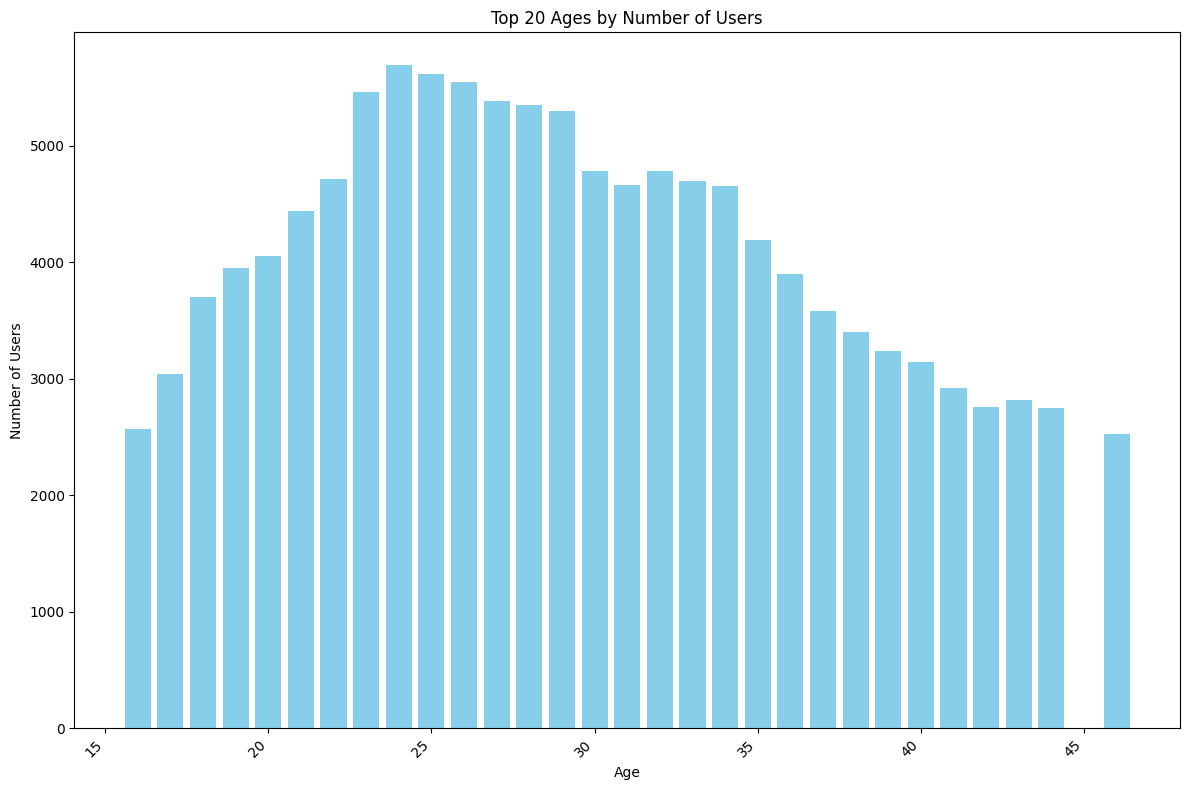

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'users' is your DataFrame and 'Age' is the column name
# Count the number of users for each age
age_counts = users['age'].value_counts()

# Select the top 20 ages
top_20_ages = age_counts.head(30)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_ages.index, top_20_ages.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Top 20 Ages by Number of Users')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

# Rating dataframe

In [29]:
# Now load the third dataframe
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", on_bad_lines='skip',low_memory=False , encoding='latin-1')

In [30]:
ratings.shape

(1149780, 3)

In [31]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

## Count the number of votes for each star rating

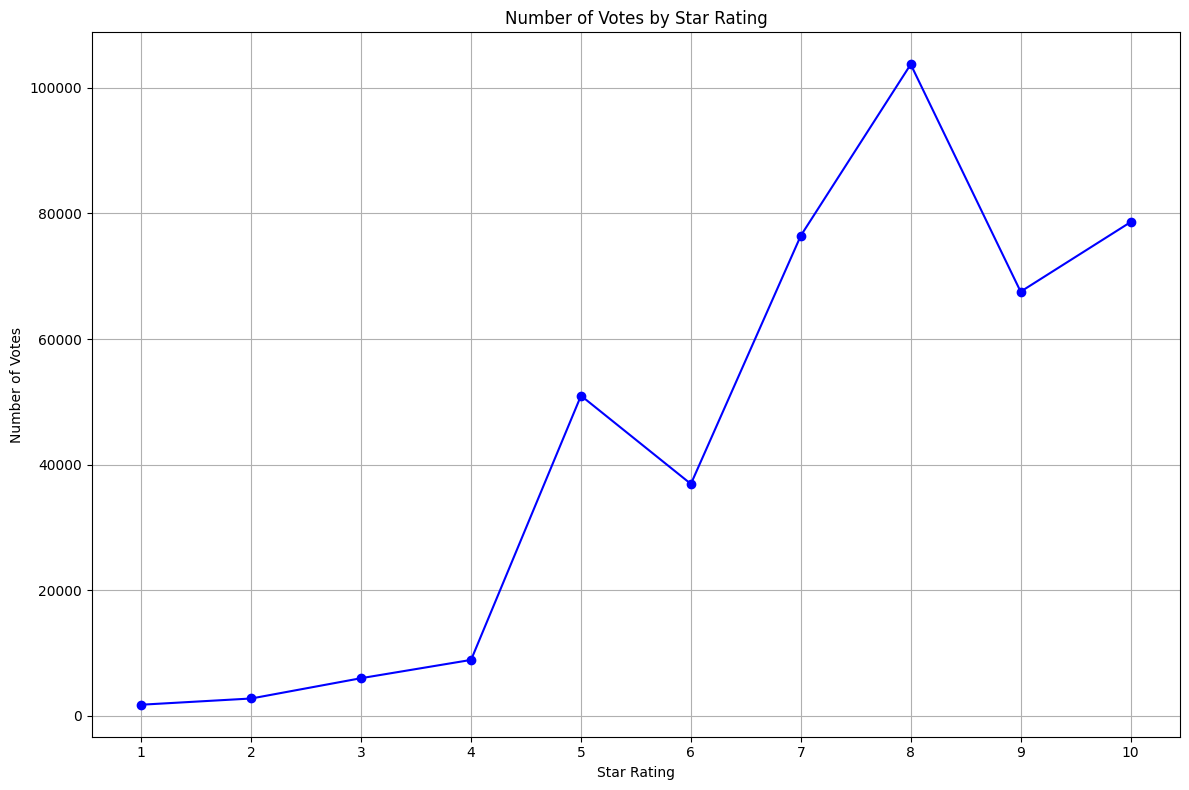

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ratings' is your DataFrame and 'Book-Rating' is the column name for star ratings
# Filter out ratings that are equal to 0
filtered_ratings = ratings[ratings['Book-Rating'] != 0]

# Count the number of votes for each star rating
star_counts = filtered_ratings['Book-Rating'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(star_counts.index, star_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Star Rating')
plt.ylabel('Number of Votes')
plt.title('Number of Votes by Star Rating')
plt.xticks(star_counts.index)  # Ensure all star ratings are shown on x-axis
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()

## Count the number of votes for each user

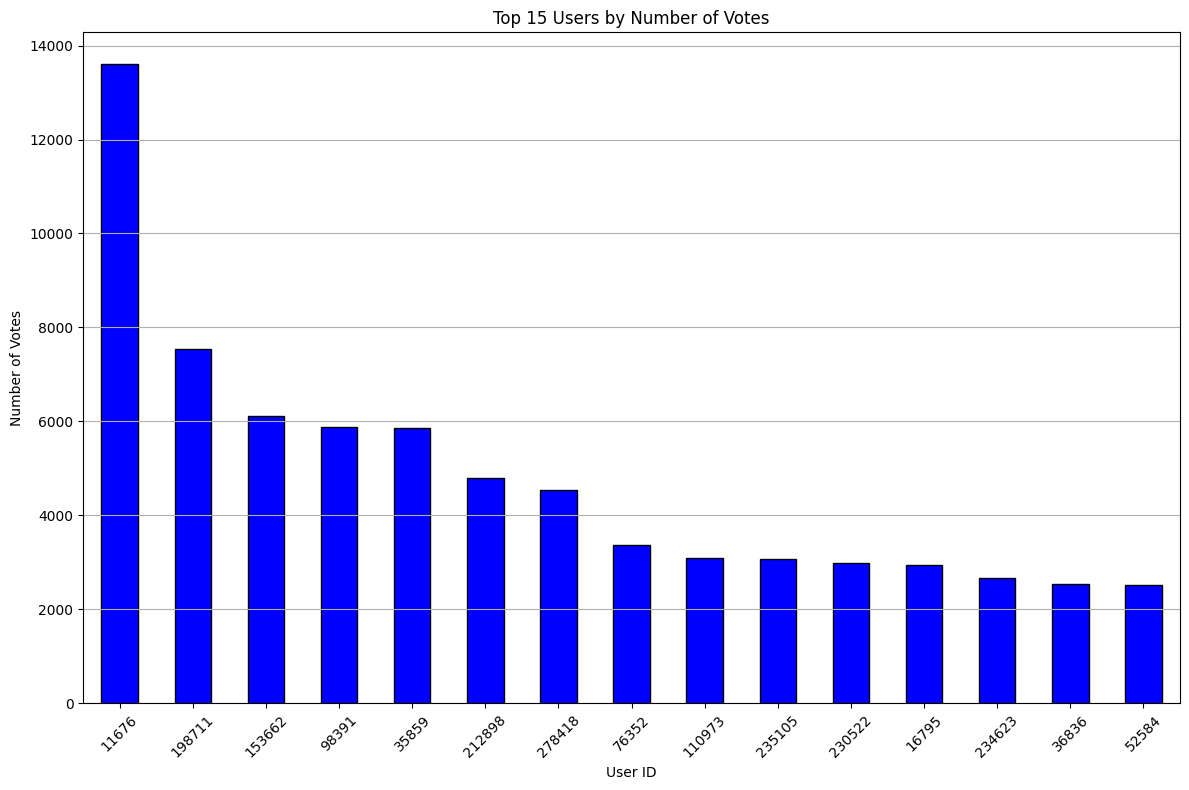

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ratings' is your DataFrame and 'User-ID' is the column name for user IDs
# Count the number of votes for each user
user_vote_counts = ratings['User-ID'].value_counts()

# Select the top 15 users with the maximum number of votes
top_15_users = user_vote_counts.head(15)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
top_15_users.plot(kind='bar', color='b', edgecolor='black')
plt.xlabel('User ID')
plt.ylabel('Number of Votes')
plt.title('Top 15 Users by Number of Votes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()

In [34]:
# Lets remane some wierd columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [35]:
print(f'book dataframe {books.shape}\nusers dataframe {users.shape}\nratings dataframe {ratings.shape}')

book dataframe (271360, 6)
users dataframe (278858, 3)
ratings dataframe (1149780, 3)


In [36]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200
x = x[x]
y= x.index


In [37]:
ratings.shape

(1149780, 3)

In [38]:
ratings['user_id'].isin(y)


0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Name: user_id, Length: 1149780, dtype: bool

In [39]:
ratings = ratings[ratings['user_id'].isin(y)]

In [40]:
ratings.shape

(526356, 3)

In [41]:
ratings['user_id'].unique().shape

(899,)

# Join ratings with books

In [42]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [43]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [44]:
# Now join ratings with books by
# ISBN (International Standard Book Number)
ratings_with_books = ratings.merge(books, on='ISBN')

In [45]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...


In [46]:
ratings_with_books.shape

(487671, 8)

In [47]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [48]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [49]:
number_rating.shape

(160269, 2)

In [50]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [51]:
number_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [52]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [53]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,13


In [54]:
final_rating.shape

(487671, 9)

In [55]:
# Lets take those books which got at least 50 rating of user
final_rating = final_rating[final_rating['num_of_rating'] >= 50]


In [56]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79


In [57]:
final_rating.shape

(61853, 9)

In [58]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [59]:
final_rating.shape

(59850, 9)

In [60]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79


# Encoder and training model

In [61]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(
    columns='user_id',
    index='title',
    values= 'rating'
    )

In [62]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [63]:
book_pivot.shape

(742, 888)

In [64]:
book_pivot.fillna(0, inplace=True)

In [65]:
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_7856\671618224.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(title, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=8, alpha=0.7)


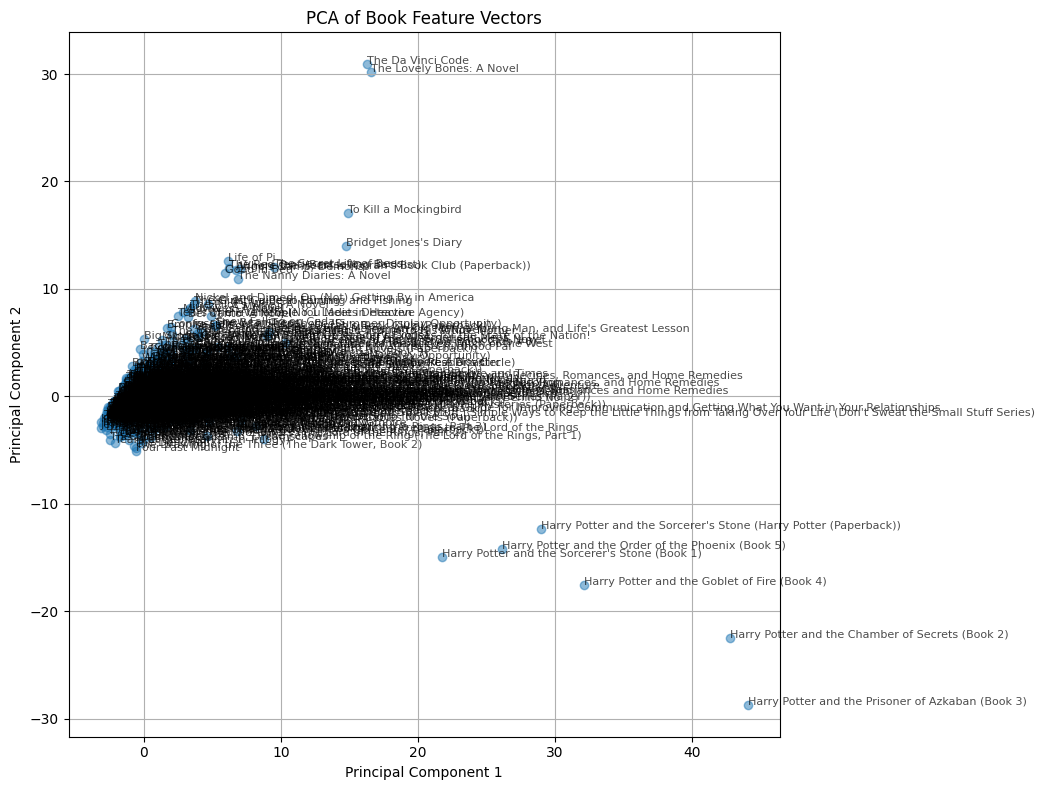

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming book_pivot is already created
# Fill NaN values with 0 (or you can use another strategy)
book_pivot_filled = book_pivot.fillna(0)

# Standardize the data
scaler = StandardScaler()
book_pivot_scaled = scaler.fit_transform(book_pivot_filled)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
book_pivot_pca = pca.fit_transform(book_pivot_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(book_pivot_pca, index=book_pivot_filled.index, columns=['PC1', 'PC2'])

# Plotting the PCA results
plt.figure(figsize=(8, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Book Feature Vectors')
plt.grid(True)
plt.tight_layout()

# Annotate points with book titles
for i, title in enumerate(pca_df.index):
    plt.annotate(title, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=8, alpha=0.7)

plt.show()

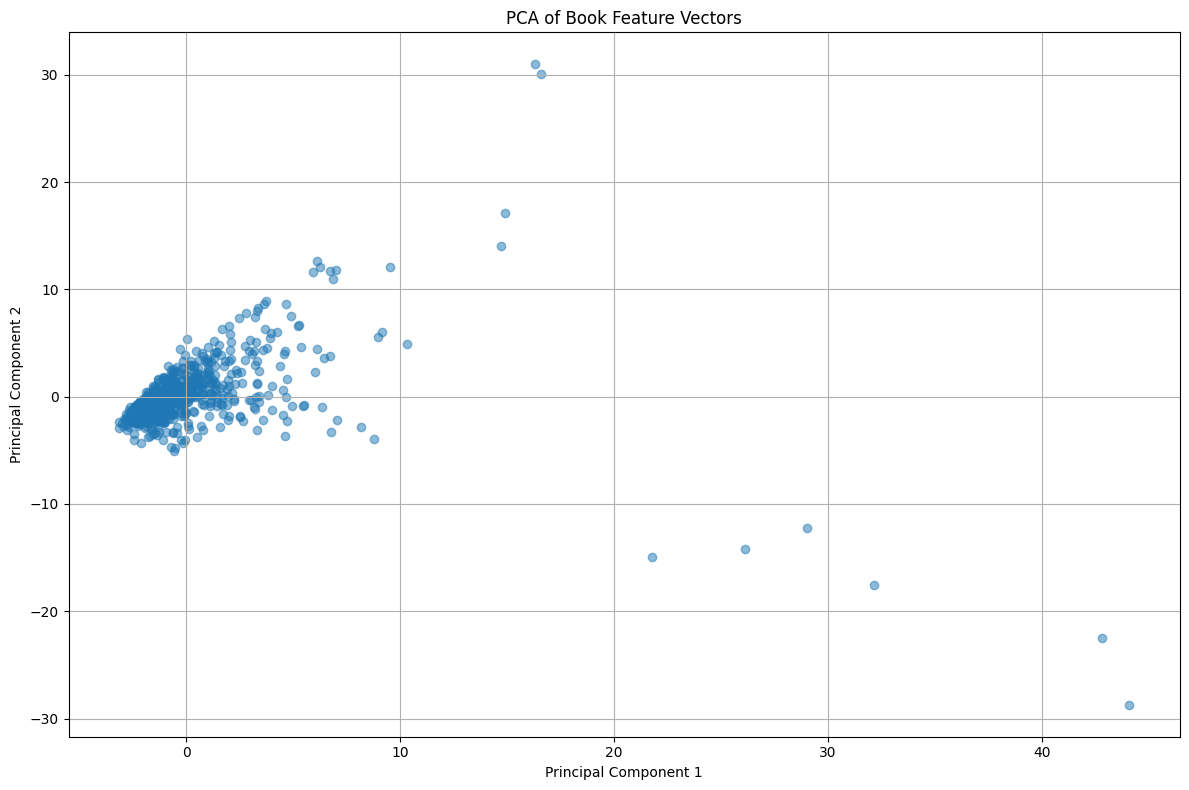

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming book_pivot is already created
# Fill NaN values with 0 (or you can use another strategy)
book_pivot_filled = book_pivot.fillna(0)

# Add an index column starting from 0
book_pivot_filled['index'] = range(len(book_pivot_filled))

# Standardize the data
scaler = StandardScaler()
book_pivot_scaled = scaler.fit_transform(book_pivot_filled.drop('index', axis=1))

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
book_pivot_pca = pca.fit_transform(book_pivot_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(book_pivot_pca, index=book_pivot_filled['index'], columns=['PC1', 'PC2'])

# Plotting the PCA results
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Book Feature Vectors')
plt.grid(True)
plt.tight_layout()
plt.show()

# Training Model

## **Using KNN library**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Assuming book_pivot is already created
# Fill NaN values with 0 (or you can use another strategy)
book_pivot_filled = book_pivot.fillna(0)

# Convert book_pivot to a sparse matrix
book_sparse = csr_matrix(book_pivot_filled)

# Train KNN
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(book_sparse)



NearestNeighbors(algorithm='brute', metric='cosine')

In [69]:
# Sample book index (replace with the actual index of the sample book)
sample_movie_index = 241

# Find similar movies
distances, indices = knn.kneighbors(book_sparse[sample_movie_index], n_neighbors=10)
similar_movies_indices = indices.flatten()


In [78]:

# Standardize the data
scaler = StandardScaler()
book_pivot_scaled = scaler.fit_transform(book_pivot_filled)



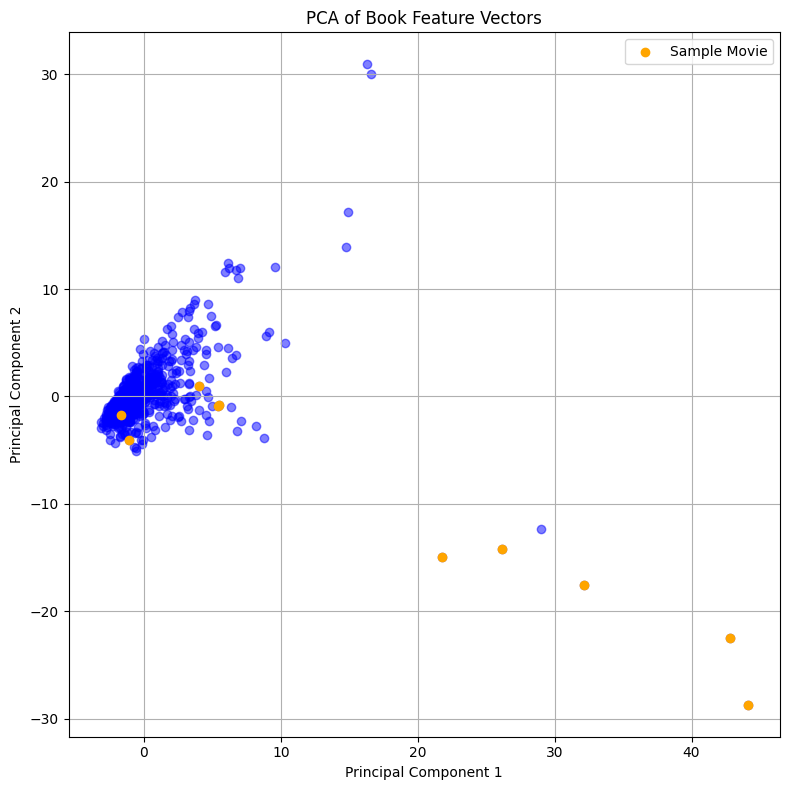

In [71]:
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
book_pivot_pca = pca.fit_transform(book_pivot_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(book_pivot_pca, index=book_pivot_filled.index, columns=['PC1', 'PC2'])

# Plotting the PCA results
plt.figure(figsize=(8, 8))

# Plot all points in blue
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, color='blue')

# Highlight the sample movie in orange
plt.scatter(pca_df['PC1'].iloc[sample_movie_index], pca_df['PC2'].iloc[sample_movie_index], color='orange', label='Sample Movie')

# Highlight the similar movies in orange
for idx in similar_movies_indices[1:]:  # Skip the first one as it is the sample movie itself
    plt.scatter(pca_df['PC1'].iloc[idx], pca_df['PC2'].iloc[idx], color='orange')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Book Feature Vectors')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

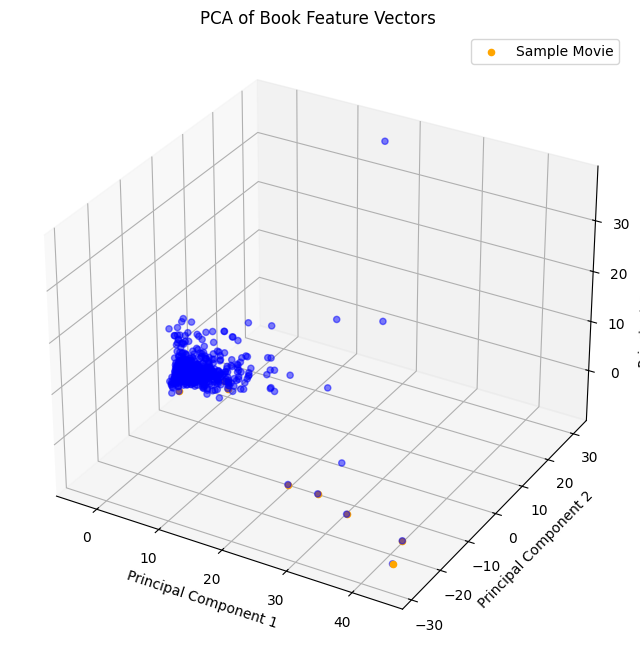

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
book_pivot_pca = pca.fit_transform(book_pivot_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(book_pivot_pca, index=book_pivot_filled.index, columns=['PC1', 'PC2', 'PC3'])

# Plotting the PCA results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all points in blue
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.5, color='blue')

# Highlight the sample movie in orange
ax.scatter(pca_df['PC1'].iloc[sample_movie_index], pca_df['PC2'].iloc[sample_movie_index], pca_df['PC3'].iloc[sample_movie_index], color='orange', label='Sample Movie')

# Highlight the similar movies in orange
for idx in similar_movies_indices[1:]:  # Skip the first one as it is the sample movie itself
    ax.scatter(pca_df['PC1'].iloc[idx], pca_df['PC2'].iloc[idx], pca_df['PC3'].iloc[idx], color='orange')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Book Feature Vectors')
ax.legend()
plt.show()

In [73]:
similar_movies_indices

array([241, 237, 240, 238, 239, 291, 514, 102, 603, 659], dtype=int64)

In [74]:
# Assuming similar_movies_indices is already defined
# and book_pivot is the DataFrame with movie titles as the index

# Extract the movie titles based on the indices
similar_movie_titles = book_pivot.index[similar_movies_indices].tolist()

# Print the movie titles
for idx, title in enumerate(similar_movie_titles):
    print(f"Movie {idx}: {title}")

Movie 0: Harry Potter and the Sorcerer's Stone (Book 1)
Movie 1: Harry Potter and the Chamber of Secrets (Book 2)
Movie 2: Harry Potter and the Prisoner of Azkaban (Book 3)
Movie 3: Harry Potter and the Goblet of Fire (Book 4)
Movie 4: Harry Potter and the Order of the Phoenix (Book 5)
Movie 5: Jacob Have I Loved
Movie 6: The Bonesetter's Daughter
Movie 7: Carolina Moon
Movie 8: The Mists of Avalon
Movie 9: The Tao of Pooh


**Find url by name**

In [75]:
# Extract the URLs based on the indices in similar_movies_indices
similar_movie_urls = [final_rating.iloc[idx]['image_url'] for idx in similar_movies_indices]

# Print the URLs
for idx, url in enumerate(similar_movie_urls):
    print(f"URL {idx}: {url}")

URL 0: http://images.amazon.com/images/P/0451155750.01.LZZZZZZZ.jpg
URL 1: http://images.amazon.com/images/P/0451128370.01.LZZZZZZZ.jpg
URL 2: http://images.amazon.com/images/P/0451153553.01.LZZZZZZZ.jpg
URL 3: http://images.amazon.com/images/P/0451139682.01.LZZZZZZZ.jpg
URL 4: http://images.amazon.com/images/P/0451152190.01.LZZZZZZZ.jpg
URL 5: http://images.amazon.com/images/P/1559029838.01.LZZZZZZZ.jpg
URL 6: http://images.amazon.com/images/P/0553277472.01.LZZZZZZZ.jpg
URL 7: http://images.amazon.com/images/P/0440225701.01.LZZZZZZZ.jpg
URL 8: http://images.amazon.com/images/P/0375707972.01.LZZZZZZZ.jpg
URL 9: http://images.amazon.com/images/P/0380717018.01.LZZZZZZZ.jpg


# Testing with new movie

In [135]:
import numpy as np

def recommend_book_knn(book_id, k=6):
    # Ensure the model is defined and trained
    if 'knn' not in globals():
        raise NameError("The KNN model is not defined. Please define and train the model before calling this function.")
    
    # Find similar books
    distances, indices = knn.kneighbors(book_sparse[book_id], n_neighbors=k)
    
    book_name = book_pivot.index[book_id]
    similar_books = []
    for i in range(1, len(indices[0])):  # Start from 1 to exclude the book itself
        similar_book_index = indices[0][i]
        similar_book_name = book_pivot.index[similar_book_index]
        distance = np.linalg.norm(book_pivot.iloc[book_id] - book_pivot.iloc[similar_book_index])
        similar_books.append((similar_book_name, distance))
    total = 0
    print(f"Books similar to '{book_name}':")
    for book, distance in similar_books:
        total += distance
        print(f"{book} - distance {distance:.4f}")
    print(f"Average distance: {total / len(similar_books):.4f}")



In [136]:
book_id = 0  # Example book index for "Harry Potter and the Sorcerer's Stone (Book 1)"
recommend_book_knn(book_id)

Books similar to '1984':
Animal Farm - distance 53.9722
The Catcher in the Rye - distance 60.3407
Lord of the Flies - distance 64.1483
The Handmaid's Tale - distance 63.8279
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death - distance 54.4243
Average distance: 59.3427


In [139]:

recommend_book_knn (3)

Books similar to '4 Blondes':
The House of the Spirits - distance 30.0666
Pleading Guilty - distance 23.0000
Seabiscuit - distance 35.6090
Bridget Jones: The Edge of Reason - distance 40.1995
Schindler's List - distance 32.7109
Average distance: 32.3172


## **Using Neural Neural Network**

In [87]:
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics.pairwise import cosine_similarity


In [89]:

# Standardize the data
scaler = StandardScaler()
book_pivot_scaled = scaler.fit_transform(book_pivot)

# Split the data into training and testing sets
X_train, X_test = train_test_split(book_pivot_scaled, test_size=0.2, random_state=42)

# Define the neural network model
model_nn = Sequential([
    Input(shape=(book_pivot_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(book_pivot_scaled.shape[1], activation='linear')
])


In [93]:

# Compile the model
model_nn.compile(optimizer='adam', loss='mse')

# Train the model
model_nn.fit(
    X_train, X_train, epochs=50, 
    batch_size=32, 
    validation_data=(X_test, X_test)
    )


Epoch 1/50
19/19 [==============================] - 2s 25ms/step - loss: 0.5618 - val_loss: 0.8731
Epoch 2/50
19/19 [==============================] - 0s 8ms/step - loss: 0.5574 - val_loss: 0.8750
Epoch 3/50
19/19 [==============================] - 0s 9ms/step - loss: 0.5477 - val_loss: 0.8745
Epoch 4/50
19/19 [==============================] - 0s 8ms/step - loss: 0.5426 - val_loss: 0.8760
Epoch 5/50
19/19 [==============================] - 0s 8ms/step - loss: 0.5390 - val_loss: 0.8756
Epoch 6/50
19/19 [==============================] - 0s 8ms/step - loss: 0.5356 - val_loss: 0.8766
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 0.5342 - val_loss: 0.8770
Epoch 8/50
19/19 [==============================] - 0s 7ms/step - loss: 0.5366 - val_loss: 0.8771
Epoch 9/50
19/19 [==============================] - 0s 7ms/step - loss: 0.5343 - val_loss: 0.8766
Epoch 10/50
19/19 [==============================] - 0s 7ms/step - loss: 0.5304 - val_loss: 0.8781
Epoch 11/50
19/19 

**Save model**

In [91]:
model_nn.save('trained_model.keras')

In [94]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('trained_model.keras')
# Extract embeddings
# Use the layers up to the embedding layer
embedding_model = Sequential(loaded_model.layers[:-3])  
book_embeddings = loaded_model.predict(book_pivot_scaled)

24/24 [==============================] - 0s 3ms/step


In [133]:
def find_similar_movies_nn(book_index, top_n=5):
    # Ensure the book index is valid
    if book_index < 0 or book_index >= len(book_pivot.index):
        raise ValueError(f"Book index {book_index} is out of range.")
    
    # Get the book name
    book_name = book_pivot.index[book_index]
    
    # Find similar books
    book_embedding = book_embeddings[book_index].reshape(1, -1)
    similarities = cosine_similarity(book_embedding, book_embeddings).flatten()
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]  # Exclude the book itself
    similar_books = []
    for similar_index in similar_indices:
        similar_book_name = book_pivot.index[similar_index]
        distance = np.linalg.norm(book_pivot.iloc[book_index] - book_pivot.iloc[similar_index])
        similar_books.append((similar_book_name, distance))
    total = 0
    # Print the similar books in the specified format
    print(f"Books similar to '{book_name}':")
    for book, distance in similar_books:
        total += distance
        print(f"{book} - distance {distance:.4f}")
    print(f"Average distance: {total/top_n:.4f}")


In [134]:
# Example usage
sample_book_index = 0  # Replace with the actual index of the sample book
find_similar_movies_nn(sample_book_index)


Books similar to '1984':
Foucault's Pendulum - distance 49.1019
Lord of the Flies - distance 64.1483
Shopaholic Takes Manhattan (Summer Display Opportunity) - distance 60.8687
The Great Gatsby - distance 55.9911
Waiting to Exhale - distance 49.1019
Average distance: 55.8424


## **Compare KNN vs Auto-encoder**

In [144]:
#recommend_book
recommend_book_knn(0)

Books similar to '1984':
Animal Farm - distance 53.9722
The Catcher in the Rye - distance 60.3407
Lord of the Flies - distance 64.1483
The Handmaid's Tale - distance 63.8279
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death - distance 54.4243
Average distance: 59.3427


In [145]:
find_similar_movies_nn(0)


Books similar to '1984':
Foucault's Pendulum - distance 49.1019
Lord of the Flies - distance 64.1483
Shopaholic Takes Manhattan (Summer Display Opportunity) - distance 60.8687
The Great Gatsby - distance 55.9911
Waiting to Exhale - distance 49.1019
Average distance: 55.8424
